Install Convokit

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Install relevant libraries and dependencies
# !pip install convokit
# !pip install readability
# !pip install hatesonar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 883 kB 12.8 MB/s 


In [2]:
!pip install ipynb

In [1]:
%cd C:\Sagar Study\ML and Learning\CP Sem-8\Project-2-Overall\NLUProject\models

C:\Sagar Study\ML and Learning\CP Sem-8\Project-2-Overall\NLUProject\models


In [163]:
# Import Standard Libraries 
import re
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

import statsmodels.api as sm


# Import third-party libraries
import readability 
from hatesonar import Sonar           # Library to classify Hate-Speech or Offensive Language
from convokit import Corpus, download # Convokit Corpus 

# Set the layouts for plots and data library outputs 
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [164]:
corpus = Corpus(filename=download("diplomacy-corpus")) # Download the DECEPTION IN DIPLOMACY corpus
print(corpus.print_summary_stats()) # Quick Stats

Dataset already exists at C:\Users\User\.convokit\downloads\diplomacy-corpus
Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246
None


In [165]:
data = corpus.get_utterances_dataframe() # Get UTTERANCES in the dataset 
print(data.head())

,timestamp,text,speaker,reply_to,conversation_id,meta.speaker_intention,meta.receiver_perception,meta.receiver,meta.absolute_message_index,meta.relative_message_index,meta.year,meta.game_score,meta.game_score_delta,meta.deception_quadrant,vectors
id,,,,,,,,,,,,,,,
Game1-italy-germany-0,74,Germany!\n\nJust the person I want to speak wi...,italy-Game1,None,Game1-italy-germany,Truth,Truth,germany-Game1,74,0,1901,3,0,Straightforward,[]
Game1-italy-germany-1,76,"You've whet my appetite, Italy. What's the sug...",germany-Game1,Game1-italy-germany-0,Game1-italy-germany,Truth,Truth,italy-Game1,76,1,1901,3,0,Straightforward,[]
Game1-italy-germany-2,86,👍,italy-Game1,Game1-italy-germany-1,Game1-italy-germany,Truth,Truth,germany-Game1,86,2,1901,3,0,Straightforward,[]
Game1-italy-germany-3,87,It seems like there are a lot of ways that cou...,germany-Game1,Game1-italy-germany-2,Game1-italy-germany,Truth,Truth,italy-Game1,87,3,1901,3,0,Straightforward,[]
Game1-italy-germany-4,89,"Yeah, I can’t say I’ve tried it and it works, ...",italy-Game1,Game1-italy-germany-3,Game1-italy-germany,Truth,None,germany-Game1,89,4,1901,3,0,Unknown,[]


In [11]:
# The Reddit Clean Function 
def clean(
        text, newline=True, quote=True, 
        bullet_point=True, dates=True, link=True, 
        strikethrough=True, spoiler=True, heading=True, 
        emoji=True, emoticon=True, contraction=True):
    
    # Newlines we dont need - only 
    if newline:
        text = re.sub(r'\n+', ' ', text)
        # Remove the many " " that we replaced in the last steo
        text = text.strip()
        text = re.sub(r'\s\s+', ' ', text)

    # > are for the qouted texts from the main comment or the reply
    if quote:
        text = re.sub(r'>', '', text)

    # Bullet points/asterisk are used for markdown like - bold/italic - Could create trouble in parsing? idk
    if bullet_point:
        text = re.sub(r'\*', '', text)
        text = re.sub('&amp;#x200B;', '', text)

    # []() Link format then we remove both the tag/placeholder and the link
    if link:
        text = re.sub(r"http\S+", '', text)
        text = re.sub(r'\[.*?\]\(.*?\)', '', text)

    # Strikethrough
    if strikethrough:
        text = re.sub('~', '', text)

    # Spoiler, which is used with < less-than (Preserves the text)
    if spoiler:
        text = re.sub('&lt;', '', text)
        text = re.sub(r'!(.*?)!', r'\1', text)

    # Heading to be removed as there are these markdown style features in reddit too
    if heading:
        text = re.sub('#', '', text)
        
    if emoji:
    # Implement the emoji scheme here. 
    # Makes more sense for the node feature but might as well import that function here if ready    
        pass
    if dates:
        text = re.sub(r'(\d+/\d+/\d+)', '', text)
    if emoticon:
    # Implement the emoticon scheme here. 
    # Makes more sense for the node feature but might as well import that function here if ready 
        pass
    
    #Needs to be the last step in the process
    # if contractions:
        # text = contractions.fix(text)
    #print("Running")    
    return text

# Calculate Readability Metrics 
# def calc_Kincaid(text):
#     read_Kincaid = readability.getmeasures((text), lang='en')['readability grades']['Kincaid']
#     return read_Kincaid
    
# def calc_GF(text):
#     read_GF = readability.getmeasures((text), lang='en')['readability grades']['GunningFogIndex']
#     return read_GF

# Data Analysis

1. Performing analysis and plotting variables that have been provided in the paper. 
2. Reproduce them
3. Do study of your own - Follow the plots

In [12]:
# Perform Data Cleaning 
data['clean_text'] = data['text'].apply(lambda text: clean(text))
data['clean_text']

id
Game1-italy-germany-0     Germany! Just the person I want to speak with....
Game1-italy-germany-1     You've whet my appetite, Italy. What's the sug...
Game1-italy-germany-2                                                     👍
Game1-italy-germany-3     It seems like there are a lot of ways that cou...
Game1-italy-germany-4     Yeah, I can’t say I’ve tried it and it works, ...
                                                ...                        
Game9-turkey-france-29                                             Mm I see
Game9-turkey-france-30      Well, just putting the option out there I guess
Game9-turkey-france-31                      you have anything else in mind?
Game9-turkey-france-32    I guess I'd also be happy to support you into ...
Game9-turkey-france-33    That would be interesting, but I think I want ...
Name: clean_text, Length: 17289, dtype: object

In [13]:
# Compute readability metrics of the data 
data['readability'] = readability.getmeasures(data['clean_text'], lang='en')['readability grades']['Kincaid']
data['readability_GF'] = readability.getmeasures(data['clean_text'], lang='en')['readability grades']['GunningFogIndex']

# Compute average Kincaid Grade level
print(data['readability'].mean())

# Compute average Gunning Fog Index Level 
print(data['readability_GF'].mean())

6.1491177116438065
10.614771051101993


Source - https://www.wyliecomm.com/2021/11/measure-reading-levels-with-readability-indexes/

**The value of Kincaid Grade level of 6.1 and GF Index around 10.6 means that the text is on the easier side**
**These values suggest that the overall readability of the text is permissible for a sophomore. Hence it can be understood by most people**

In [42]:
# Computing these scores where there is an occurence of deception 
data_decep = data[data['meta.speaker_intention']=='Lie']
data_decep = data_decep[data_decep['meta.receiver_perception']=='Truth']

# data.drop(['readability_GF'], axis=1, inplace=True)

# Compute readability metrics of the new data 
print(data_decep['readability'].mean())
print(data_decep['readability_GF'].mean())

# No observable change in values 

6.1491177116444025
10.614771051105695


In [124]:
# Compute average text length and compare with the length of deceptive text 
data['sent_length'] = data['clean_text'].apply(lambda text: len(text))
data_decep['sent_length'] = data_decep['clean_text'].apply(lambda text: len(text))

# Print average lengths
print(data['sent_length'].mean())
print(data_decep['sent_length'].mean())

104.71085661403204
154.37771345875544


**Deceptive texts are usually longer as they consist of more positive connotations, phrases and clauses than normal text. Also, it consists of more verbose to convince or appease the listener.**

In [15]:
data['readability'].value_counts()

6.148031    17289
Name: readability, dtype: int64

In [ ]:
data.iloc[25, ]

timestamp                                                                    341
text                           How are things going with England? I think tha...
speaker                                                              italy-Game1
reply_to                                                  Game1-italy-germany-24
conversation_id                                              Game1-italy-germany
meta.speaker_intention                                                     Truth
meta.receiver_perception                                                   Truth
meta.receiver                                                      germany-Game1
meta.absolute_message_index                                                  341
meta.relative_message_index                                                   25
meta.year                                                                   1901
meta.game_score                                                                4
meta.game_score_delta       

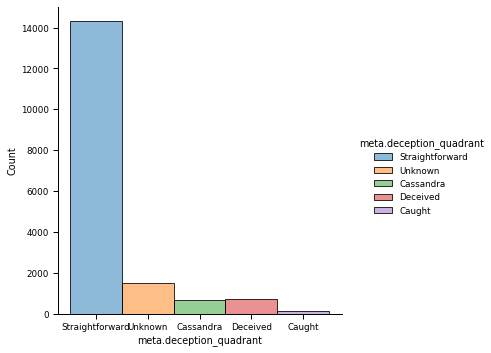

In [ ]:
#Study the distribution of deception quadrant
sns.displot(data.dropna(axis=0, how='all'), x='meta.deception_quadrant', hue='meta.deception_quadrant')
plt.show()

In [ ]:
# EDA for all games
# Message Count
print(f"Message Count - {data.shape[0]}")

# Actual Lie Count
data_act_lie = data[(data['meta.speaker_intention']=='Lie')]
print(f"Actual Lie Count - {data_act_lie.shape[0]}")

#Suspected Lie Count
data_sus = data[data['meta.speaker_intention'] == 'Truth']
data_sus_lie = data_sus[data_sus['meta.receiver_perception'] == 'Lie']
print(f"Suspected Lie Count - {data_sus_lie.shape[0]}")

#Average Word Count
data_length=data['text'].apply(lambda sent : len(sent))
print(f"Average Word Count - {(data_length.values.sum())/len(data):.2f}")

Message Count - 17289
Actual Lie Count - 887
Suspected Lie Count - 667
Average Word Count - 105.08


In [ ]:
#A lie-lie statement
data_caught = data_act_lie[data_act_lie['meta.receiver_perception']=='Lie']
data_caught['text'][0]

'I give you my word: I don’t know what England is going to do and I haven’t asked.'

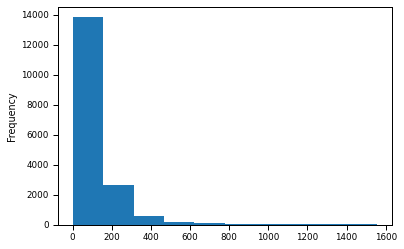

In [ ]:
# Distribution of Word Count per message
data_length.plot.hist(grid=False)

<Figure size 720x1080 with 0 Axes>

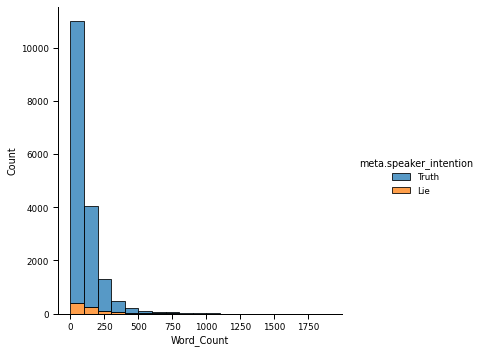

In [ ]:
#Word Count of Text by Speaker's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.speaker_intention', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()

<Figure size 720x1080 with 0 Axes>

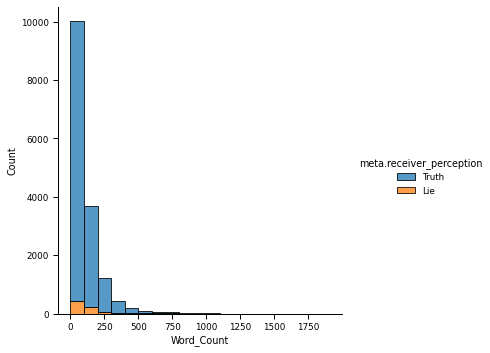

In [ ]:
#Word Count of Text by Receiver's perception
data['Word_Count'] = data['text'].apply(lambda sent : len(sent))
plt.figure(figsize=(10, 15))
sns.displot(data.dropna(axis=0, how='all'), x='Word_Count', hue='meta.receiver_perception', multiple='stack', bins=[i for i in range(0, 2000, 100)])
plt.show()

In [51]:
data_decep = data_decep.reset_index()

In [53]:
data_decep['id'].unique()

array(['Game1-italy-germany-132', 'Game1-italy-germany-135',
       'Game1-italy-germany-139', 'Game1-italy-germany-144',
       'Game1-italy-germany-158', 'Game1-italy-germany-175',
       'Game1-italy-germany-181', 'Game1-italy-germany-205',
       'Game1-italy-germany-206', 'Game1-italy-germany-213',
       'Game1-italy-germany-214', 'Game1-italy-germany-216',
       'Game1-italy-germany-221', 'Game1-italy-germany-226',
       'Game1-italy-germany-227', 'Game1-italy-germany-228',
       'Game1-italy-germany-230', 'Game1-italy-germany-234',
       'Game1-italy-germany-236', 'Game1-italy-germany-238',
       'Game1-italy-germany-242', 'Game1-italy-germany-243',
       'Game1-italy-germany-245', 'Game1-italy-germany-247',
       'Game1-italy-germany-248', 'Game1-italy-germany-251',
       'Game1-italy-germany-254', 'Game1-italy-germany-255',
       'Game1-italy-germany-256', 'Game1-italy-germany-259',
       'Game1-italy-germany-263', 'Game1-italy-germany-264',
       'Game1-italy-germ

In [152]:
# Capture a list of modifier words(adverbs and adjectives) in deceptive text 
# List of modifier words
# According to the PENN Treebank Project, the list of all probable modifier POS tags are stored 
adj_pos_tags = ['JJ', 'JJR', 'JJS']
adv_pos_tags = ['RB', 'RBR, RBS']
pos_modal_vbs = ['shall', 'should', 'can', 'could', 'will', 'would', 'may', 'must', 'might']
self_ref = ['I', 'me', 'mine', 'we', 'our', 'ours', 'us']
# def count_mod(text):
#     words = nltk.word_tokenize(text)
#     word_tag_lst = nltk.pos_tag(words)
#     cnt_tags = 0 
#     for (word, tag) in word_tag_lst:
#         if tag in adj_pos_tags or tag in adv_pos_tags:
#             cnt_tags += 1
            
#     return cnt_tags

# Modal verbs that indicate possibility 
# def cnt_possib(text):
#     cnt_mods = 0
#     words = text.split(" ")
#     for word in words:
#         if word in pos_modal_vbs:
#             cnt_mods += 1
#     return cnt_mods

# Count list of self-references
def cnt_self_ref(text):
    cnt_self=0
    words = text.split()
    for word in words:
        if word in self_ref:
            cnt_self += 1
    return cnt_self
    




# Capture Count of Modifiers for the entire dataframe sum them acording to user values
# data_decep['cnt_modifiers'] = data_decep['clean_text'].apply(lambda text: count_mod(text))

# Capture modal verbs that indicate possibility 
# modals_by_id = {}
# data_decep['cnt_mods'] = data_decep['clean_text'].apply(lambda text: cnt_possib(text))
# for user_id in data_decep['user_id_vals'].unique():
#     data_user = data_decep[data_decep['user_id_vals'] == user_id]
#     modals_by_id[user_id] = sum(data_user['cnt_mods'])

    
# pp_by_id = {}
# data_decep
# data_decep['cnt_mods'] = data_decep['clean_text'].apply(lambda text: cnt_possib(text))
# for user_id in data_decep['user_id_vals'].unique():
#     data_user = data_decep[data_decep['user_id_vals'] == user_id]
#     modals_by_id[user_id] = sum(data_user['cnt_mods'])
from collections import OrderedDict

self_by_id = {}
data_decep['self_ref'] = data_decep['clean_text'].apply(lambda text: cnt_self_ref(text))
for user_id in data_decep['user_id_vals'].unique():
    data_user = data_decep[data_decep['user_id_vals'] == user_id]
    self_by_id[user_id] = sum(data_user['self_ref'])
self_by_id = dict(sorted(self_by_id.items(), key = lambda x: x[1], reverse = True))

# Capture modifier count by user IDs
# mod_by_id = {}
# for user_id in data_decep['user_id_vals'].unique():
#     data_user = data_decep[data_decep['user_id_vals'] == user_id]
#     mod_by_id[user_id] = sum(data_user['cnt_modifiers'])
# data_decep['user_id_vals'] = data_decep['id'].map(decept_user_map)
# deceptive_users = list(data_decep['user_id_vals'].unique())


# for user_id in deceptive_users:
#     data_user = data_decep[data_decep['user_id_vals']==user_id]
#     = data_user['text'].apply(lambda text: count_mod(text))
#     mod_by_id[user_id] = count_mod
    
# Create a count and plot a histogram. Calculate average value and keep it as a threshold 

# Plot and save average value. Extend the average value to future datasets for verification 

In [65]:
decept_user_map = pd.{user: val for (val, user) in enumerate(deceptive_users)}

In [85]:
sum(data_decep['cnt_modifiers'])

2910

(array([397., 152.,  77.,  30.,  17.,   5.,   3.,   2.,   7.,   1.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <BarContainer object of 10 artists>)

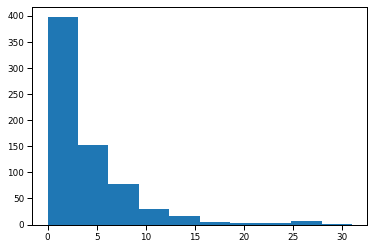

In [89]:
mod_by_id.values()

(array([395., 169.,   0.,  84.,   0.,  29.,   8.,   0.,   4.,   2.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

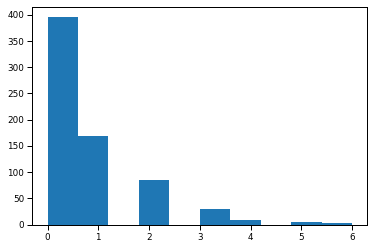

In [94]:
# Test of modality 
modals_by_id = sorted()
plt.hist(modals_by_id.values())

(array([390., 126.,  70.,  38.,  25.,  22.,  11.,   4.,   2.,   3.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

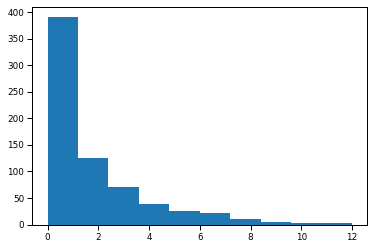

In [122]:
plt.hist(self_by_id.values())

In [149]:
data_extra = data[data['meta.speaker_intention']=='Truth']
data_extra = data[data['meta.receiver_perception']=='Truth']
data_extra = data_extra.reset_index()

self_by_id_auth = {}
data_extra['self_ref'] = data_extra['clean_text'].apply(lambda text: cnt_self_ref(text))
for user_id in data_extra['id'].unique():
    data_user = data_extra[data_extra['id'] == user_id]
    self_by_id_auth[user_id] = sum(data_user['self_ref'])
    
self_by_id_auth = dict(sorted(self_by_id_auth.items(), key = lambda x: x[1], reverse = True))

In [151]:
self_by_id_auth

{'Game7-england-germany-45': 18,
 'Game1-germany-france-80': 15,
 'Game3-italy-germany-99': 15,
 'Game5-england-france-59': 13,
 'Game1-italy-germany-245': 12,
 'Game1-italy-germany-246': 12,
 'Game1-italy-france-1': 12,
 'Game1-england-germany-186': 12,
 'Game6-germany-russia-11': 12,
 'Game1-england-italy-120': 11,
 'Game1-italy-france-78': 11,
 'Game1-italy-france-137': 11,
 'Game1-england-germany-522': 11,
 'Game3-italy-germany-68': 11,
 'Game4-turkey-russia-70': 11,
 'Game6-england-france-52': 11,
 'Game7-england-russia-45': 11,
 'Game9-austria-italy-16': 11,
 'Game1-italy-germany-286': 10,
 'Game1-italy-germany-289': 10,
 'Game1-england-italy-198': 10,
 'Game1-england-germany-553': 10,
 'Game3-italy-france-42': 10,
 'Game4-england-russia-37': 10,
 'Game4-england-france-68': 10,
 'Game4-turkey-france-50': 10,
 'Game9-italy-russia-247': 10,
 'Game1-italy-germany-109': 9,
 'Game1-austria-italy-17': 9,
 'Game1-austria-italy-143': 9,
 'Game1-england-italy-470': 9,
 'Game10-austria-ita

In [159]:
import random

samp1 = random.sample(self_by_id.keys(), k=500)
samp2 = random.sample(self_by_id_auth.keys(), k=500)
sample_deceive_dict = {key: self_by_id[key] for key in samp1}
sample_truth_dict = {key: self_by_id_auth[key] for key in samp2}

(array([270., 102.,  52.,  27.,  18.,  17.,   7.,   4.,   1.,   2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

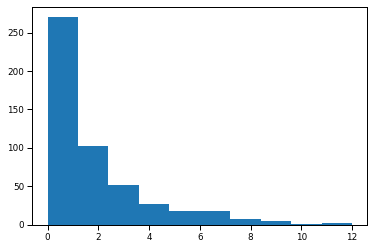

In [161]:
plt.hist(sample_deceive_dict.values())

(array([241., 150.,  60.,   0.,  19.,  20.,   0.,   5.,   3.,   2.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

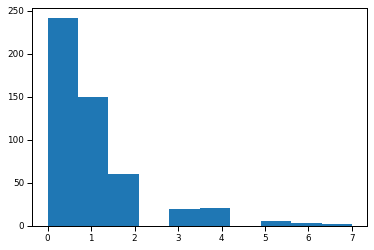

In [162]:
plt.hist(sample_truth_dict.values())